In [87]:
import pandas as pd
import numpy as np
import ggplot
from plotnine import ggplot, aes, geom_line, geom_smooth

%matplotlib inline


### Read in data

In [4]:
doc_preJan_df = pd.read_csv('../../data/latest_data/PA_DOC_testing_data.csv')
doc_postJan_df = pd.read_csv('../../data/latest_data/PA_DOC_Daily_Counts.csv')
pop_df = pd.read_csv('../../data/latest_data/Daily_Populations_aggregated.csv')
county_df = pd.read_csv('../../data/State_wide_data/COVID-19_Aggregate_Death_Data_Current_Daily_County_Health.csv')

### Clean dates

In [16]:
doc_preJan_df['date'] = pd.to_datetime(doc_preJan_df['date'])

doc_postJan_df['date'] = pd.to_datetime(doc_postJan_df['date'])

pop_df['date'] = pd.to_datetime(pop_df['date'])

county_df['date'] = pd.to_datetime(county_df['Date of Death'])

#### Put together old and new DOC data for death rates

In [62]:
doc_preJan_deaths = doc_preJan_df[['date','incarcerated_person_death','SCI']]
doc_postJan_deaths = doc_postJan_df[['date','incarcerated_person_deaths','SCI']]
doc_postJan_deaths.columns = ['date','deaths','SCI']
doc_preJan_deaths.columns = ['date','deaths','SCI']

doc_death = pd.concat([doc_preJan_deaths,doc_postJan_deaths]).sort_values(by='date')

#### Add population data

In [63]:
doc_death = pd.merge(doc_death,pop_df[['date','SCI','population']],on=['date','SCI'])

### Generate Death Rates

In [64]:
doc_death['per_1000'] = np.round((doc_death['deaths']/doc_death['population'])*1000,2)

### County Level Data

In [66]:
county_df['DeathRate_1000'] = county_df['Total Death Rate']/100

## Plotting

First start with Phoenix and Philadelphia comparison (TBD what proportion of SCI Phoenix incarcerated individuals are from Philly.)

In [73]:

combined = pd.merge(doc_death.loc[doc_death.SCI == "Phoenix",['date','per_1000']],
         county_df.loc[county_df['County Name'] == "Philadelphia",['date','DeathRate_1000']],
         on='date')

combined.columns = ['date','Phoenix','Philadelphia']

melted_combined = combined.melt(id_vars='date')

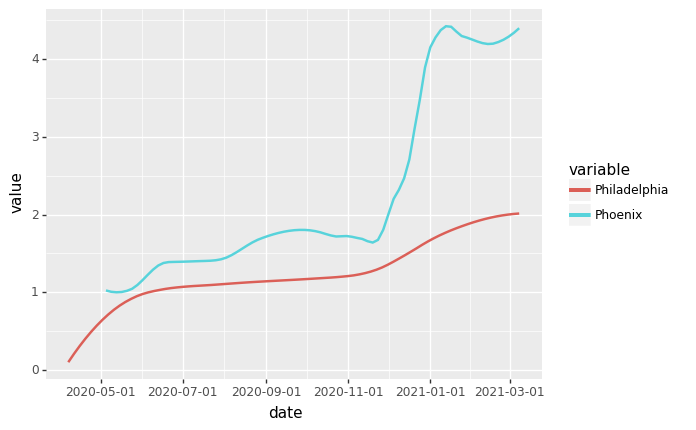

<ggplot: (317250905)>

In [89]:
(ggplot(melted_combined,
       aes(x = 'date', y = 'value', color='variable')) +
geom_smooth(span=0.2,se=False))